In [87]:
import numpy as np
import pylab as  plt
import os
import requests

In [94]:
def load_covid_data():
    d1 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
    d2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
    r = requests.get(d1)
    if r.status_code == 200:
        with open("time_series_covid19_confirmed_global.csv", 'w') as out:
            out.write(r.text)
    r = requests.get(d2)
    if r.status_code == 200:
        with open("time_series_covid19_deaths_global.csv", 'w') as out:
            out.write(r.text)

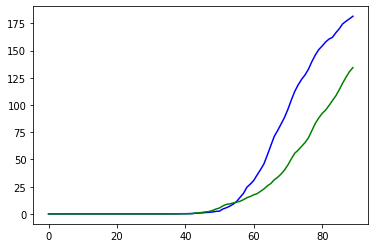

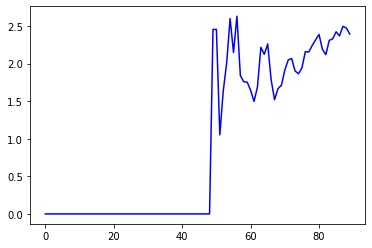

In [95]:
cases = "time_series_covid19_confirmed_global.csv"
deaths= "time_series_covid19_deaths_global.csv"

def get_data(fname, country):
    with open(fname, 'r') as ein:
        lines = ein.read().splitlines()
    for line in lines[1:]:
        l = line.split(",")
        if l[1].strip() == country:
            data = [int(x) for x in l[4:]]
            return np.array(data)

de_cases = get_data(cases, "Germany")
se_cases = get_data(cases, "Sweden")

de_deaths = get_data(deaths, "Germany")
se_deaths = get_data(deaths, "Sweden")

plt.plot(de_cases/8.1e7 * 1.0e5, 'b')
plt.plot(se_cases/1.1e7 * 1.0e5, 'g')
plt.figure()
plt.plot((se_deaths/1.1e7 * 1.0e5)/(de_deaths/8.1e7 * 1.0e5 + 1.0e-8), 'b')

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv.csv

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

In [3]:
def compute_new_cases(d):
    a = list(d[1:] - d[0:-1])
    a.insert(0,0)
    return np.array(a)


In [74]:
def compute_dt_Rt(d0):
    for i in range(len(d0)):
        if d0[i] > 0:
            break
    d = d0[i:]
    d = np.where(d == 0, 1, d)

    c0 = d[1:] - d[0:-1]
    for i in range(len(c0)):
        if c0[i] > 0:
            break
    d = d[i:]
    newc = c0[i:]
    newc = np.where(newc < 1, 1, newc)
    
    c = 4
    dt = d[c:]/d[0:-c]
    limit = np.exp(4.0/50)
    dt = np.where(dt < limit, limit, dt)
    dt = np.log(dt) / 4.0

    a = []
    b = []
    for i in range(len(newc)-2*c):
        a.append(np.sum(newc[i:i+c]))
        b.append(np.sum(newc[i+c:i+2*c]))
    a = np.array(a)
    b = np.array(b)
    a = np.where(a == 0, 1, a)
    Rt = b/a
    
    return dt, Rt, c


In [76]:
def plot_Rt(dt, Rc):
    nn = len(dt)
    t = np.mgrid[0.0:nn:nn*1j]
    
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('time [days]')
    ax1.set_ylabel('1/dt', color='m')
    ax1.plot(t, 1/dt, 'm')
    ax1.tick_params(axis='y', labelcolor='m')

    nn = len(Rt)
    t = np.mgrid[0.0:nn:nn*1j]
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Rt', color='b')  # we already handled the x-label with ax1
    ax2.plot(t, Rt, 'b')
    plt.axis([None,None,0.5,3.5])
    ax2.tick_params(axis='y', labelcolor='b')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped


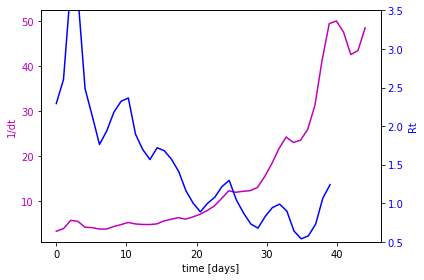

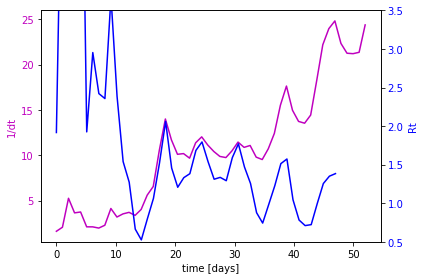

In [77]:
import rki_cases
cumc, cumd = rki_cases.get_data()
newc = compute_new_cases(cumc)
newd = compute_new_cases(cumd)
nn = len(cumc)

de_cases = get_data(cases, "Germany")
dt, Rt, c = compute_dt_Rt(cumc)
plot_Rt(dt, Rt)

se_cases = get_data(cases, "Sweden")
dt, Rt, c = compute_dt_Rt(se_cases)
plot_Rt(dt, Rt)


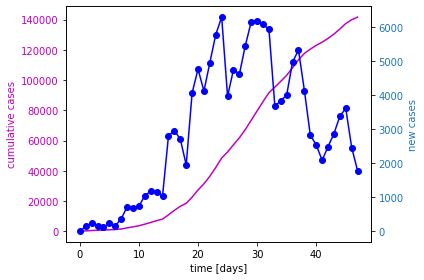

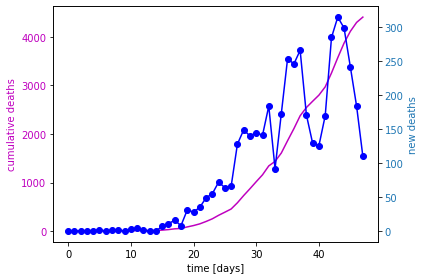

In [84]:
fig, ax1 = plt.subplots()

color = 'm'
ax1.set_xlabel('time [days]')
ax1.set_ylabel('cumulative cases', color=color)
ax1.plot(cumc, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('new cases', color=color)  # we already handled the x-label with ax1
ax2.plot(newc, 'b')#color=color)
ax2.plot(newc, 'bo')#color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

###########################################################

fig, ax1 = plt.subplots()

color = 'm'
ax1.set_xlabel('time [days]')
ax1.set_ylabel('cumulative deaths', color=color)
ax1.plot(cumd, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('new deaths', color=color)  # we already handled the x-label with ax1
ax2.plot(newd, 'b')
ax2.plot(newd, 'bo')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

###########################################################

plt.show()

In [ ]:
# https://www.spiegel.de/wissenschaft/medizin/corona-nur-sechs-prozent-der-weltweiten-faelle-werden-erfasst-a-c9520fce-a102-49fe-8290-fec96fa8ed40
mortality = 1.38e-2
cumulative_deaths = 732
cumulative_detected_14_adys_before = 8198
a = (cumulative_deaths / cumulative_detected_14_adys_before / mortality) # a = 6.5, 1/a = 0.15 = 15%
print(a, 1/a)